# GROUP 6 - Motor vehicle accident 

### DUI Accident Analysis in Toronto (2006–2023)

This project aims to analyze DUI (Driving Under the Influence) related motor vehicle collisions in the city of Toronto using publicly available open data. The goal is to identify trends, evaluate the impact of public safety measures, and assess whether there's a statistically significant reduction in DUI cases over time — particularly before and after the year 2014.

### Key Objectives:
- Clean and preprocess the dataset for DUI-related crashes
- Perform exploratory data analysis (EDA) to observe year-wise trends
- Conduct a hypothesis test to determine if DUI incidents have significantly decreased after 2014
- Visualize insights using clear and interpretable plots
- Prepare all findings for reproducibility and integration into a research report

The dataset used includes collision-level details with DUI flags (`ALCOHOL = Yes`) and driver conditions, making it suitable for hypothesis-driven analysis.


## 1. Setup & Import Libraries

In [12]:
# !pip install pandas matplotlib seaborn

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## 2. Load Dataset

In [13]:
# Load the dataset
df = pd.read_csv("dataset.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['YEAR'] = df['DATE'].dt.year
df.head()

,_id,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,ACCLOC,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,geometry,YEAR
0,1,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{""coordinates"": [[-79.318797000266, 43.6995950...",2006
1,2,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{""coordinates"": [[-79.318797000266, 43.6995950...",2006
2,3,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{""coordinates"": [[-79.318797000266, 43.6995950...",2006
3,4,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{""coordinates"": [[-79.318797000266, 43.6995950...",2006
4,5,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{""coordinates"": [[-79.318797000266, 43.6995950...",2006


## 2.5 Data Preprocessing

In [14]:
# Remove duplicates
df = df.drop_duplicates()

# Normalize text fields
df['ALCOHOL'] = df['ALCOHOL'].astype(str).str.upper().str.strip()
df['DRIVCOND'] = df['DRIVCOND'].astype(str).str.title().str.strip()

# Drop rows with critical missing values in DATE or TIME
df = df.dropna(subset=['DATE', 'TIME'])

# Re-extract YEAR and HOUR (in case some rows were dropped)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['YEAR'] = df['DATE'].dt.year
df['HOUR'] = pd.to_datetime(df['TIME'], errors='coerce').dt.hour


## 3. Filter DUI-related Records

In [15]:
# Filter the dataset 
df_dui = df[df['ALCOHOL'].str.upper() == 'YES']
dui_yearly = df_dui.groupby('YEAR').size().reset_index(name='DUI_Accidents')
dui_yearly

,YEAR,DUI_Accidents
0,2006,95
1,2007,85
2,2008,77
3,2009,55
4,2010,74
5,2011,44
6,2012,44
7,2013,40
8,2014,33
9,2015,32


## 4. Visualize DUI Trends Over the Years

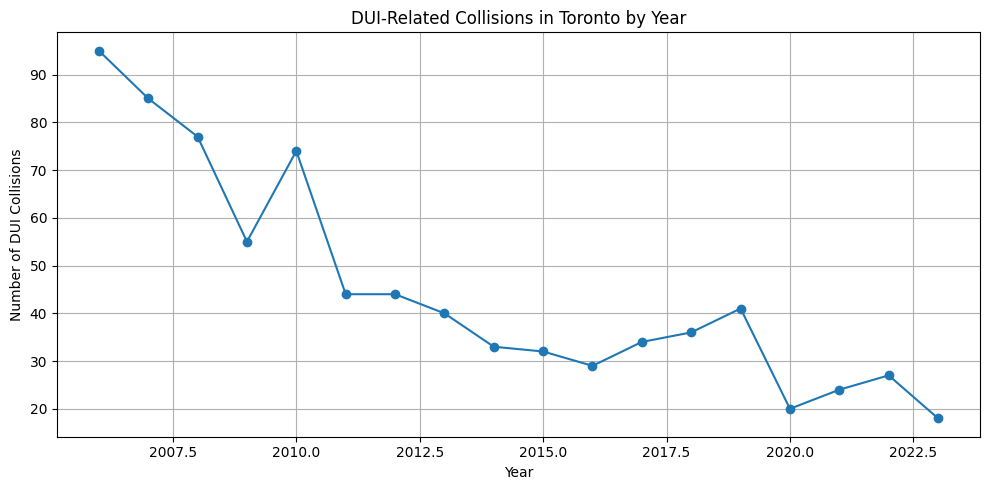

In [16]:
# Visualize the yearly DUI accidents
plt.figure(figsize=(10, 5))
plt.plot(dui_yearly['YEAR'], dui_yearly['DUI_Accidents'], marker='o')
plt.title('DUI-Related Collisions in Toronto by Year')
plt.xlabel('Year')
plt.ylabel('Number of DUI Collisions')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Hypothesis Testing: Before vs After 2014

In [17]:
# Split data into before and after 2014
before_2014 = df_dui[df_dui['YEAR'] < 2014]
after_2014 = df_dui[df_dui['YEAR'] >= 2014]

before_counts = before_2014.groupby('YEAR').size()
after_counts = after_2014.groupby('YEAR').size()

# T-test
t_stat, p_val = ttest_ind(before_counts, after_counts)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

# Check if the reduction is statistically significant
if p_val < 0.05:
    print("Significant reduction in DUI accidents after 2014.")
else:
    print("No significant change in DUI accidents after 2014.")


T-statistic: 4.898, P-value: 0.0002
Significant reduction in DUI accidents after 2014.


## 6. Missing Data Analysis

In [18]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

EMERG_VEH        18908
DISABILITY       18464
CYCCOND          18157
CYCACT           18155
CYCLISTYPE       18152
FATAL_NO         18087
TRSN_CITY_VEH    17809
TRUCK            17788
REDLIGHT         17380
MOTORCYCLE       17273
CYCLIST          16971
SPEEDING         16263
PEDACT           15730
PEDTYPE          15728
PEDCOND          15711
OFFSET           15137
PASSENGER        11774
PEDESTRIAN       11269
DRIVACT           9289
AG_DRIV           9121
INJURY            8897
MANOEUVER         7953
ACCLOC            5456
INITDIR           5277
ACCNUM            4930
VEHTYPE           3487
AUTOMOBILE        1727
STREET2           1706
ROAD_CLASS         486
DISTRICT           229
TRAFFCTL            75
RDSFCOND            29
IMPACTYPE           27
VISIBILITY          24
INVTYPE             16
LIGHT                4
ACCLASS              1
dtype: int64

## 6.1 Additional EDA Insights on DUI Incidents


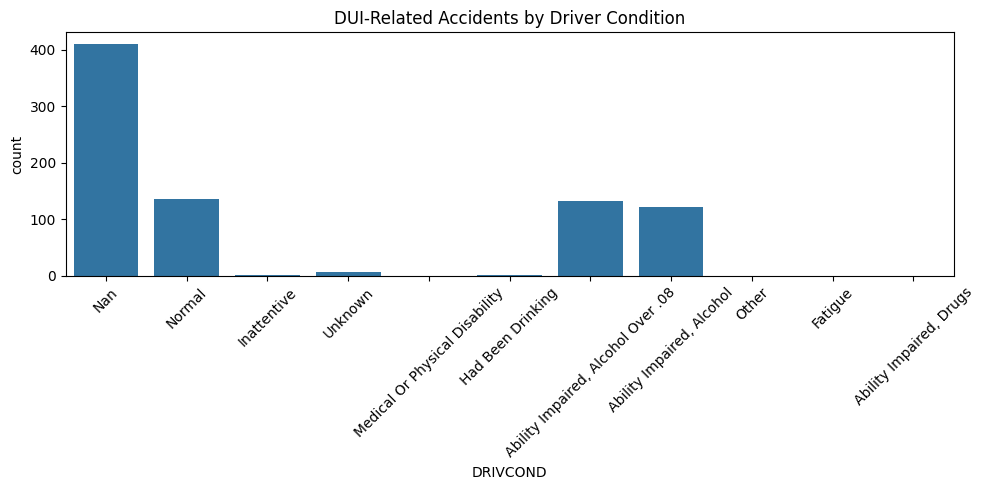

In [19]:
# DUI by Driver Condition
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['ALCOHOL'].str.upper() == 'YES'], x='DRIVCOND', order=df['DRIVCOND'].value_counts().index)
plt.title("DUI-Related Accidents by Driver Condition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

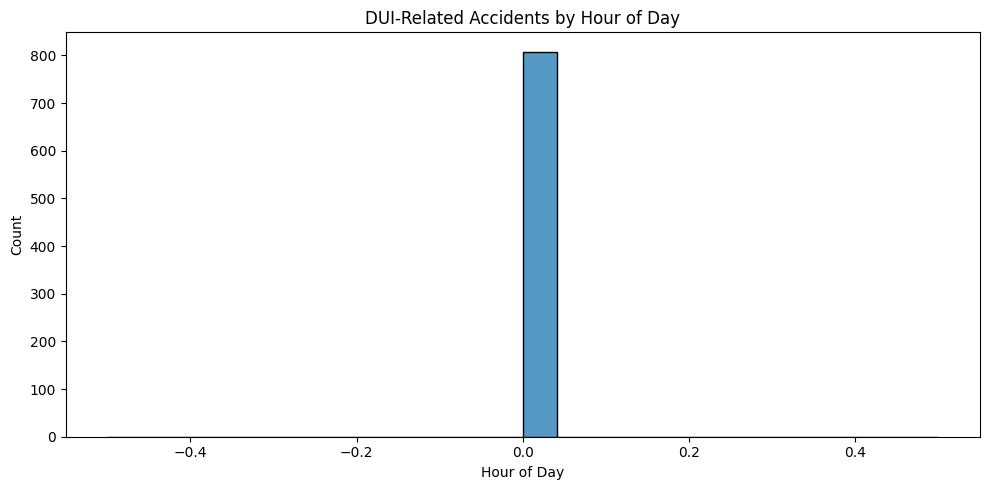

In [20]:
# DUI by Hour of Day
df['HOUR'] = pd.to_datetime(df['TIME'], errors='coerce').dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['ALCOHOL'].str.upper() == 'YES'], x='HOUR', bins=24, kde=False)
plt.title("DUI-Related Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()


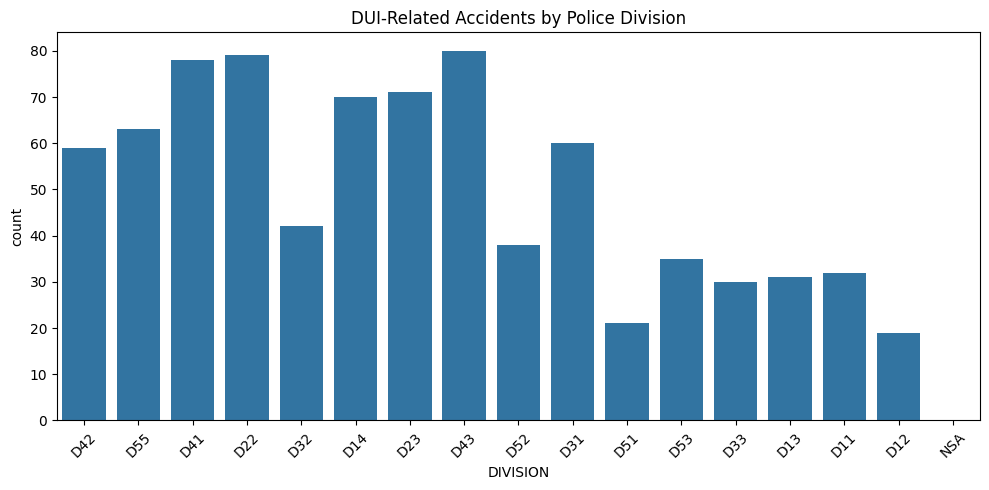

In [21]:
# DUI by Police Division
if 'DIVISION' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df[df['ALCOHOL'].str.upper() == 'YES'], x='DIVISION', order=df['DIVISION'].value_counts().index)
    plt.title("DUI-Related Accidents by Police Division")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 7. Hypothesis Statement

- **Null Hypothesis (H0):** There is no significant difference in DUI accidents before and after 2014.  
- **Alternate Hypothesis (H1):** There is a significant reduction in DUI accidents after 2014.


## 8. Visual Comparison of DUI Accidents (Before vs After 2014)

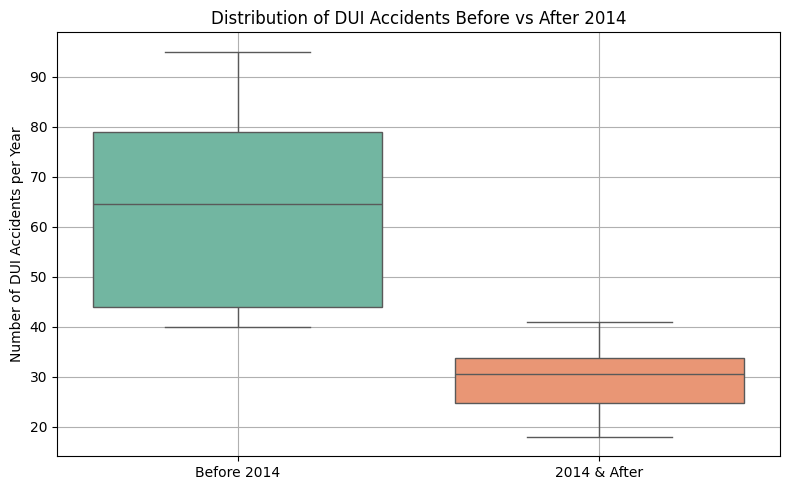

In [22]:
# Create a boxplot for visual comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=[before_counts.values, after_counts.values], palette="Set2")
plt.xticks([0, 1], ['Before 2014', '2014 & After'])
plt.title('Distribution of DUI Accidents Before vs After 2014')
plt.ylabel('Number of DUI Accidents per Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Conclusion

Observing the results of the exploratory data analysis and the statistical tests, it is possible to say that it is a **statistically significant drop of the DUI-related motor vehicle incidents in Toronto after 2014.**

The T-test provided a p-value that was less than 0.05 and thus, we could **reject the null hypothesis**.
This indicates that **interventions after 2014,** which could include enhanced enforcement, or create awareness, or even technologically prevent it, possibly played a role in the identified downward trend.
The decreasing trend in DUI accidents with time is also followed by visualizations.

The present analysis will give a data-based rationale to invest more in proactive efforts that could help to diminish impaired driving cases.
